國泰人壽數據分析
====
### 1. 在樣本數5000筆的訓練結果，四種模型預測準確率如下:
* SVM準確率: 0.485
* 決策樹準確率: 0.57
* Adaboost最低準確率: 0.519
* 多項式樸素貝葉斯準確率: 0.4060

### 2. 所有樣本229504筆的訓練結果，四種模型預測準確率如下:
* SVM耗時較長，準確率也沒有提高
* 決策樹準確率:  0.7895340730842968
* Adaboost最低準確率:  0.5564544239818742
* 多項式樸素貝葉斯準確率: 0.3856

### 3. 選擇決策樹進一步訓練，將測試集特徵值欄位改為僅有 AGE, SEX, BUDGET, MARRIAGE四個欄位
* 準確率由79%提升到88%。

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 數據加載
#file_dir = '/Volumes/GoogleDrive/我的雲端硬碟/python/東海大學/Ｒ程式語言實作/國泰金控大數據比賽原始資料/'
file_dir = 'G:/我的雲端硬碟/python/東海大學/Ｒ程式語言實作/國泰金控大數據比賽原始資料/'
train_buy_data = pd.read_csv(file_dir + 'train_buy_info.csv')
# train_cust_data = pd.read_csv(file_dir + 'train_cust_info.csv')
# train_tpy_data = pd.read_csv(file_dir + 'train_tpy_info.csv')

# test_buy_x_data = pd.read_csv(file_dir + 'test_buy_x_info.csv')
# test_cust_x_data = pd.read_csv(file_dir + 'test_cust_x_info.csv')
# test_tpy_x_data = pd.read_csv(file_dir + 'test_tpy_x_info.csv')

"""
test集未包含y預測值
1. 依據train建立模型
2. K折拆分預測模型準確率
3. 將test集輸入模型，輸出結果，將結果寫進excel檔中
"""

'\ntest集未包含y預測值\n1. 依據train建立模型\n2. K折拆分預測模型準確率\n3. 將test集輸入模型，輸出結果，將結果寫進excel檔中\n'

In [3]:
print(train_buy_data.info())
"""
看個欄位儲存的資料格式，確認欄位數，缺值數。

1. 13個欄位有['CUST_ID', 'BUY_TYPE', 'AGE', 'SEX', 'HEIGHT', 'WEIGHT', 'OCCUPATION',
       'CHILD_NUM', 'BUY_MONTH', 'BUY_YEAR', 'CITY_CODE', 'BUDGET',
       'MARRIAGE']
2. 229504筆資料，其中HEIGHT, WEIGHT有缺值
3. Buy_type有7種，該欄取為預測的y值
"""

print('-'*30)
print(train_buy_data.describe())
"""
僅列出int, float欄位
"""
print('-'*30)
print(train_buy_data.describe(include=['O']))
"""
describe出object的欄位
1. buy_year可以drop掉，因為資料都是同一年
2. occupation職業別
"""
print('-'*30)
print(train_buy_data.head())
print('-'*30)
print(train_buy_data.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229504 entries, 0 to 229503
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   CUST_ID     229504 non-null  int64  
 1   BUY_TYPE    229504 non-null  object 
 2   AGE         229504 non-null  object 
 3   SEX         229504 non-null  object 
 4   HEIGHT      212696 non-null  float64
 5   WEIGHT      212696 non-null  float64
 6   OCCUPATION  229504 non-null  object 
 7   CHILD_NUM   229504 non-null  int64  
 8   BUY_MONTH   229504 non-null  int64  
 9   BUY_YEAR    229504 non-null  object 
 10  CITY_CODE   229504 non-null  object 
 11  BUDGET      229504 non-null  float64
 12  MARRIAGE    229504 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 22.8+ MB
None
------------------------------
            CUST_ID         HEIGHT         WEIGHT      CHILD_NUM  \
count  2.295040e+05  212696.000000  212696.000000  229504.000000   
mean   1.497660e+06     

In [4]:
# 1. 為身高、體重補值
train_buy_data['HEIGHT'].fillna(train_buy_data['HEIGHT'].mean(), inplace=True)
train_buy_data['WEIGHT'].fillna(train_buy_data['WEIGHT'].mean(), inplace=True)
train_buy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229504 entries, 0 to 229503
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   CUST_ID     229504 non-null  int64  
 1   BUY_TYPE    229504 non-null  object 
 2   AGE         229504 non-null  object 
 3   SEX         229504 non-null  object 
 4   HEIGHT      229504 non-null  float64
 5   WEIGHT      229504 non-null  float64
 6   OCCUPATION  229504 non-null  object 
 7   CHILD_NUM   229504 non-null  int64  
 8   BUY_MONTH   229504 non-null  int64  
 9   BUY_YEAR    229504 non-null  object 
 10  CITY_CODE   229504 non-null  object 
 11  BUDGET      229504 non-null  float64
 12  MARRIAGE    229504 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 22.8+ MB


a    21905
e    19845
k    19530
h    19257
f    18860
g    18560
l    17857
j    17467
i    16797
d    14273
m    14123
c     9116
n     8430
b     7557
o     3507
p     1754
q      666
Name: AGE, dtype: int64


d:\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


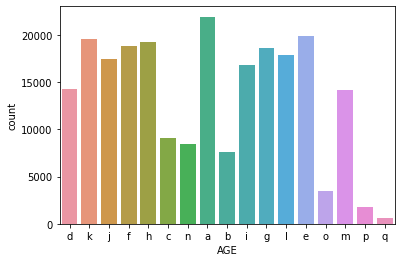

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17}


d:\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


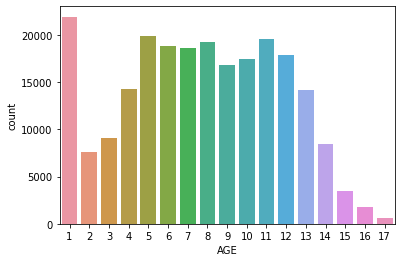

In [5]:
# 2. 將年齡改成int

print(train_buy_data['AGE'].value_counts())
age_count = train_buy_data['AGE'].value_counts()

sns.countplot(train_buy_data['AGE'],label="Count")
plt.show()

age_dict = {}
num = 1
for i in range(97, 97 + 17):
    age_dict[chr(i)] = num
    num += 1
print(age_dict)

train_buy_data['AGE']=train_buy_data['AGE'].map(age_dict)

sns.countplot(train_buy_data['AGE'],label="Count")
plt.show()

d:\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


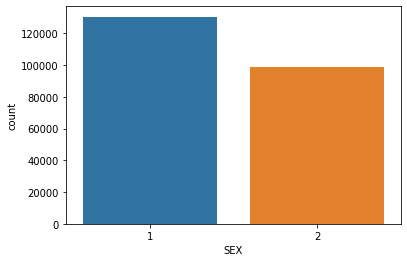

In [6]:
# 3. 將性別改為1,2
train_buy_data['SEX']=train_buy_data['SEX'].map({'a':1,'b':2})
sns.countplot(train_buy_data['SEX'],label="Count")
plt.show()

d:\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


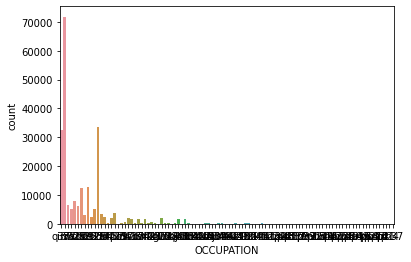

d:\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


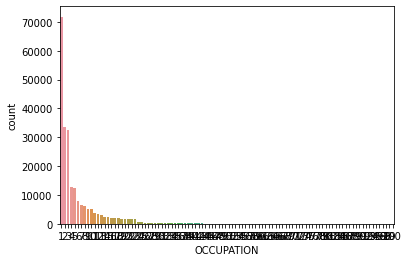

In [7]:
# 4.將職業轉換成數值
sns.countplot(train_buy_data['OCCUPATION'],label="Count")
plt.show()

occu_count = train_buy_data['OCCUPATION'].value_counts()
tmp_dict = occu_count.to_dict()

# 將職業占比只有不到1%的全改為1，總共僅有15種選項。
def func_occu_dict_other(tmp_dict):
    occu_dict = {}
    num = 2
    for k in tmp_dict:
        if tmp_dict[k]/229504 < 0.01:
            rep_num = 1
            occu_dict[k] = rep_num
        else:
            rep_num = num
            occu_dict[k] = rep_num
            num += 1
    return occu_dict

# 將職業全部轉為數字`,總共有100種選項
def func_occu_dict(tmp_dict):
    occu_dict = {}
    num = 1
    for k, v in tmp_dict.items():
        occu_dict[k] = num
        num += 1
    return occu_dict    

occu_dict = func_occu_dict(tmp_dict)

train_buy_data['OCCUPATION']=train_buy_data['OCCUPATION'].map(occu_dict)

sns.countplot(train_buy_data['OCCUPATION'],label="Count")
plt.show()

d:\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


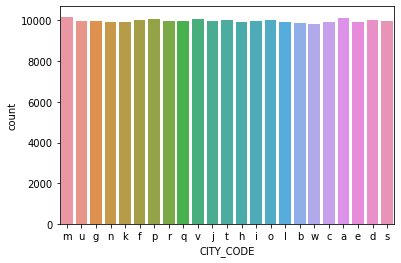

{'m': 1, 'a': 2, 'p': 3, 'v': 4, 'f': 5, 't': 6, 'o': 7, 'd': 8, 'i': 9, 'r': 10, 'j': 11, 's': 12, 'q': 13, 'g': 14, 'u': 15, 'e': 16, 'c': 17, 'h': 18, 'n': 19, 'k': 20, 'l': 21, 'b': 22, 'w': 23}


d:\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


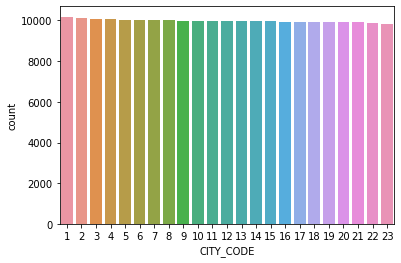

In [8]:
# 5. 將地區轉為數值
sns.countplot(train_buy_data['CITY_CODE'],label="Count")
plt.show()

code_count = train_buy_data['CITY_CODE'].value_counts()

code_dict = {}
for k,v in enumerate(code_count.index):
    code_dict[v] = k + 1
print(code_dict)

train_buy_data['CITY_CODE']=train_buy_data['CITY_CODE'].map(code_dict)
sns.countplot(train_buy_data['CITY_CODE'],label="Count")
plt.show()

d:\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


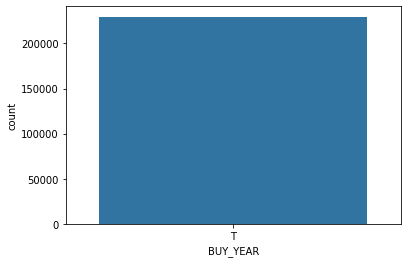

In [9]:
# 6.由於年都是同一年，drop掉
sns.countplot(train_buy_data['BUY_YEAR'],label="Count")
plt.show()
train_buy_data.drop(['BUY_YEAR'], inplace=True, axis =1)

In [1]:
sns.countplot(train_buy_data['MARRIAGE'],label="Count")
plt.show()

def two_lst_for_pie(data):
    tmp_dict = data.value_counts().to_dict()
    nums = []
    labels = []
    for k in tmp_dict:
        nums.append(tmp_dict[k])
        labels.append(k)
    return nums, labels

def print_pie_plot(data, value):
    fil = (data == value)
    data_fil = train_buy_data[fil]
    
    sns.countplot(data_fil['BUY_TYPE'],label="Count")
    plt.show()  

    nums, labels = two_lst_for_pie(data_fil['BUY_TYPE'])

    print(f'用Matplotlib画饼图，當{value}時，大部分買那些')
    plt.pie(x = nums, labels=labels)
    plt.show()

fil = (train_buy_data['MARRIAGE']=='c')
data_mar_c = train_buy_data[fil]

sns.countplot(data_mar_c['BUY_TYPE'],label="Count")
plt.show()  
    
nums, labels = two_lst_for_pie(data_mar_c['BUY_TYPE'])

print('用Matplotlib画饼图，當marriage = C時，大部分買e')
plt.pie(x = nums, labels=labels)
plt.show()

print_pie_plot(train_buy_data['MARRIAGE'], 'e')

NameError: name 'sns' is not defined

d:\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


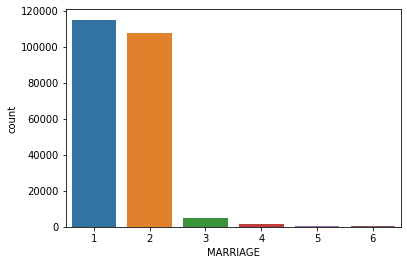

In [11]:
# 7. 將marriage改為數值
train_buy_data['MARRIAGE']=train_buy_data['MARRIAGE'].map({'b':1,'f':2,'a':3,'d':4,'e':5,'c':6})
sns.countplot(train_buy_data['MARRIAGE'],label="Count")
plt.show()

d:\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


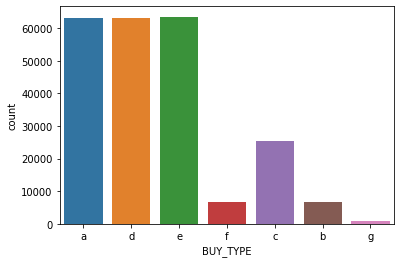

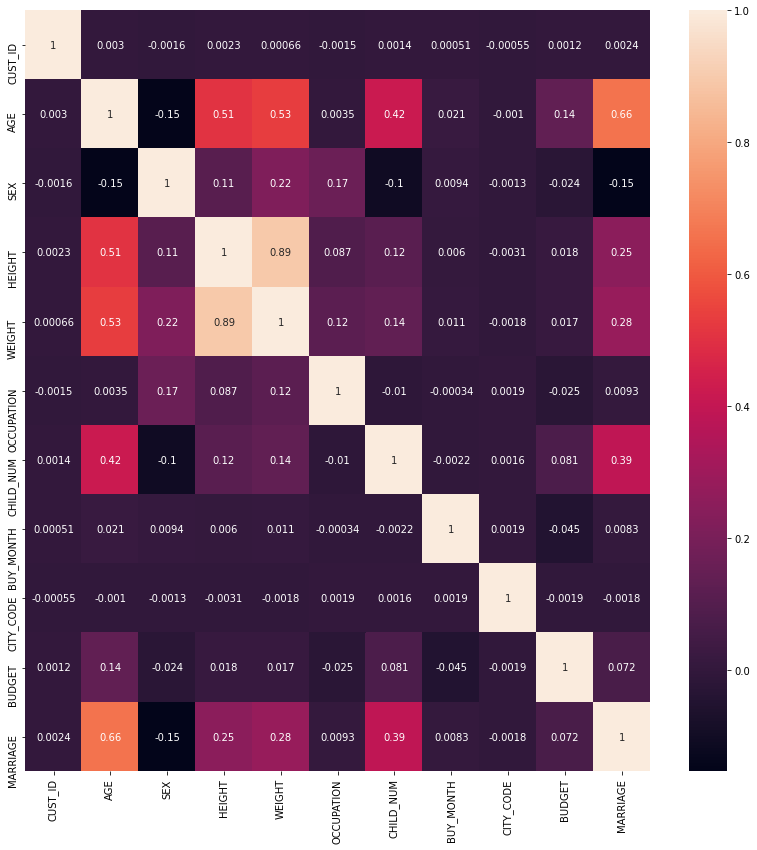

In [12]:
# 8. 看buy_type的數量差異，以及seaborn看各個欄位彼此關係
sns.countplot(train_buy_data['BUY_TYPE'],label="Count")
plt.show()

corr = train_buy_data.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True)
plt.show()


建模
====
使用以下幾種方式建模，看哪種預測較準:
1. SVM分類器
2. Adaboots分類器
3. 決策樹分類器
4. Naive Bayes分類器

In [13]:
print(train_buy_data.columns)  #看有哪些欄位，直接選取需要的欄位做測試與訓練集
features = train_buy_data.columns.to_list()
print(features)


Index(['CUST_ID', 'BUY_TYPE', 'AGE', 'SEX', 'HEIGHT', 'WEIGHT', 'OCCUPATION',
       'CHILD_NUM', 'BUY_MONTH', 'CITY_CODE', 'BUDGET', 'MARRIAGE'],
      dtype='object')
['CUST_ID', 'BUY_TYPE', 'AGE', 'SEX', 'HEIGHT', 'WEIGHT', 'OCCUPATION', 'CHILD_NUM', 'BUY_MONTH', 'CITY_CODE', 'BUDGET', 'MARRIAGE']


In [14]:
# 1. 選取樣本，先取樣5000筆作測試
from sklearn.model_selection import train_test_split

train_buy_data_sample = train_buy_data.sample(n=5000)

features = ['AGE',
            'SEX',
            'HEIGHT',
            'WEIGHT',
            'OCCUPATION',
            'CHILD_NUM',
            'BUY_MONTH',
            'CITY_CODE',
            'BUDGET',
            'MARRIAGE']

train_buy, test_buy = train_test_split(train_buy_data_sample, test_size = 0.3)
train_x = train_buy[features]
train_y = train_buy['BUY_TYPE']
test_x = test_buy[features]
test_y =test_buy['BUY_TYPE']

模型一: SVM
====

In [15]:
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
train_x = ss.fit_transform(train_x)
test_x = ss.transform(test_x)

# 创建SVM分类器
model = svm.SVC()
# 用训练集做训练
model.fit(train_x,train_y)
# 用测试集做预测
prediction=model.predict(test_x)

svm_score = metrics.accuracy_score(test_y, prediction)
print('SVM準確率: ', svm_score)

SVM準確率:  0.4533333333333333


模型2,3: 決策樹、Adaboost比較
====


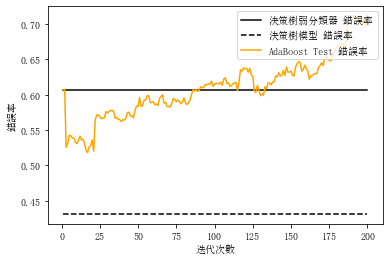

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import zero_one_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  AdaBoostClassifier

# 設置AdaBoost迭代次數
n_estimators=200

# 弱分類器
dt_stump = DecisionTreeClassifier(max_depth=1,min_samples_leaf=1)
dt_stump.fit(train_x, train_y)
dt_stump_err = 1.0-dt_stump.score(test_x, test_y)

# 決策樹分類器
dt = DecisionTreeClassifier()
dt.fit(train_x,  train_y)
dt_err = 1.0-dt.score(test_x, test_y)

# AdaBoost分類器，集成許多弱分類器dt_stump
ada = AdaBoostClassifier(base_estimator=dt_stump,n_estimators=n_estimators)
ada.fit(train_x,  train_y)

# 三個分類器的錯誤率可視化
fig = plt.figure()

# 設置plt正確顯示中文
plt.rcParams['font.sans-serif'] = ['SimSun']
ax = fig.add_subplot(111)
ax.plot([1,n_estimators],[dt_stump_err]*2, 'k-', label=u'決策樹弱分類器 錯誤率')
ax.plot([1,n_estimators],[dt_err]*2,'k--', label=u'決策樹模型 錯誤率')
ada_err = np.zeros((n_estimators,))

# 遍歷每次迭代的結果 i為迭代次數，pred_y為預測結果
for i,pred_y in enumerate(ada.staged_predict(test_x)):
     # 統計錯誤率
    ada_err[i]=zero_one_loss(pred_y, test_y)
    
# 繪製每次迭代的AdaBoost錯誤率
ax.plot(np.arange(n_estimators)+1, ada_err, label='AdaBoost Test 錯誤率', color='orange')
ax.set_xlabel('迭代次數')
ax.set_ylabel('錯誤率')
leg=ax.legend(loc='upper right',fancybox=True)
plt.show()

In [17]:
tree_score = 1-dt_err
Ada_score = 1-ada_err.min()
print("決策樹準確率: ", 1-dt_err)
print("Adaboost最低準確率: ", 1-ada_err.min())

決策樹準確率:  0.5686666666666667
Adaboost最低準確率:  0.482


模型4: Naive Bayes分類器
====

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing

mm = preprocessing.MinMaxScaler()
train_mm_x = mm.fit_transform(train_x)
test_mm_x = mm.transform(test_x)

# 創建Naive Bayes分類器
mnb = MultinomialNB()
mnb.fit(train_mm_x, train_y) 
predict_y = mnb.predict(test_mm_x) 

bay_score = metrics.accuracy_score(test_y, predict_y)
print("多項式樸素貝葉斯準確率: %.4lf" % bay_score)

多項式樸素貝葉斯準確率: 0.4007


## 在樣本數5000筆的情況下，四種模型預測準確率如下:
1. SVM準確率:  0.485
2. 決策樹準確率:  0.57
3. Adaboost最低準確率:  0.519
4. 多項式樸素貝葉斯準確率: 0.4060

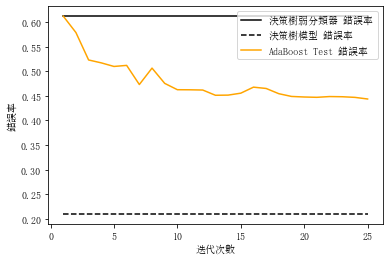

決策樹準確率:  0.7895340730842968
Adaboost最低準確率:  0.5564544239818742
多項式樸素貝葉斯準確率: 0.3856


In [19]:
train_buy, test_buy = train_test_split(train_buy_data, test_size = 0.3)
train_x = train_buy[features]
train_y = train_buy['BUY_TYPE']
test_x = test_buy[features]
test_y =test_buy['BUY_TYPE']

ss = StandardScaler()
train_x = ss.fit_transform(train_x)
test_x = ss.transform(test_x)

# # 創建SVM分類器
# model = svm.SVC()
# # 用訓練集訓練
# model.fit(train_x,train_y)
# # 用測試集做預測
# prediction=model.predict(test_x)

# svm_score = metrics.accuracy_score(test_y, prediction)
# print('='*50)
# print('SVM準確率: ', svm_score)
# print('='*50)

# 設置AdaBoost迭代次數
n_estimators=25

# 弱分類器
dt_stump = DecisionTreeClassifier(max_depth=1,min_samples_leaf=1)
dt_stump.fit(train_x, train_y)
dt_stump_err = 1.0-dt_stump.score(test_x, test_y)

# 決策樹分類器
dt = DecisionTreeClassifier()
dt.fit(train_x,  train_y)
dt_err = 1.0-dt.score(test_x, test_y)

# AdaBoost分類器，集成許多弱分類器dt_stump
ada = AdaBoostClassifier(base_estimator=dt_stump,n_estimators=n_estimators)
ada.fit(train_x,  train_y)

# 三個分類器的錯誤率可視化
fig = plt.figure()

# 設置plt正確顯示中文
plt.rcParams['font.sans-serif'] = ['SimSun']
ax = fig.add_subplot(111)
ax.plot([1,n_estimators],[dt_stump_err]*2, 'k-', label=u'決策樹弱分類器 錯誤率')
ax.plot([1,n_estimators],[dt_err]*2,'k--', label=u'決策樹模型 錯誤率')
ada_err = np.zeros((n_estimators,))

# 遍歷每次迭代的結果 i為迭代次數，pred_y為預測結果
for i,pred_y in enumerate(ada.staged_predict(test_x)):
     # 統計錯誤率
    ada_err[i]=zero_one_loss(pred_y, test_y)
    
# 繪製每次迭代的AdaBoost錯誤率
ax.plot(np.arange(n_estimators)+1, ada_err, label='AdaBoost Test 錯誤率', color='orange')
ax.set_xlabel('迭代次數')
ax.set_ylabel('錯誤率')
leg=ax.legend(loc='upper right',fancybox=True)
plt.show()

tree_score = 1-dt_err
Ada_score = 1-ada_err.min()
print("決策樹準確率: ", 1-dt_err)
print("Adaboost最低準確率: ", 1-ada_err.min())
print('='*50)

mm = preprocessing.MinMaxScaler()
train_mm_x = mm.fit_transform(train_x)
test_mm_x = mm.transform(test_x)

# 創建Naive Bayes分類器
mnb = MultinomialNB()
mnb.fit(train_mm_x, train_y) 
predict_y = mnb.predict(test_mm_x) 

bay_score = metrics.accuracy_score(test_y, predict_y)
print("多項式樸素貝葉斯準確率: %.4lf" % bay_score)
print('='*50)

將features欄位改為 AGE, SEX, BUDGET, MARRIAGE，四個欄位
====
準確率由78%提升到88%。

In [24]:
features = ['AGE',
            'SEX',
            'BUDGET',
            'MARRIAGE']

train_buy, test_buy = train_test_split(train_buy_data, test_size = 0.3)
train_x = train_buy[features]
train_y = train_buy['BUY_TYPE']
test_x = test_buy[features]
test_y =test_buy['BUY_TYPE']

ss = StandardScaler()
train_x = ss.fit_transform(train_x)
test_x = ss.transform(test_x)

dt = DecisionTreeClassifier()
dt.fit(train_x,  train_y)
dt_err = 1.0-dt.score(test_x, test_y)
print("決策樹準確率: ", 1-dt_err)

決策樹準確率:  0.8856968570266659
